<a href="https://colab.research.google.com/github/Janaalsh5/Heart-Disease/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New classfacation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv('/content/Prerocced1_data.csv')


print(data)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140        289.0          0           1   
1     49    0              2        160        180.0          0           1   
2     37    1              1        130        283.0          0           2   
3     48    0              0        138        214.0          0           1   
4     54    1              2        150        195.0          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110        264.0          0           1   
914   68    1              0        144        193.0          1           1   
915   57    1              0        130        131.0          0           1   
916   57    0              1        130        236.0          0           0   
917   38    1              2        138        175.0          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  Hear


Information Gain (Entropy):

Splitting Data into: 70% Training and 30% Test

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

fn= data.keys().tolist()[:-1]
X= data[fn]
y=data['HeartDisease']
# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=1
)

# Initialize the Decision Tree Classifier using entropy as criterion
classifier = DecisionTreeClassifier(criterion='entropy', random_state=1)

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

# Predict labels for the test dataset
y_pred = classifier.predict(X_test)

[[ 91  18]
 [ 45 122]]


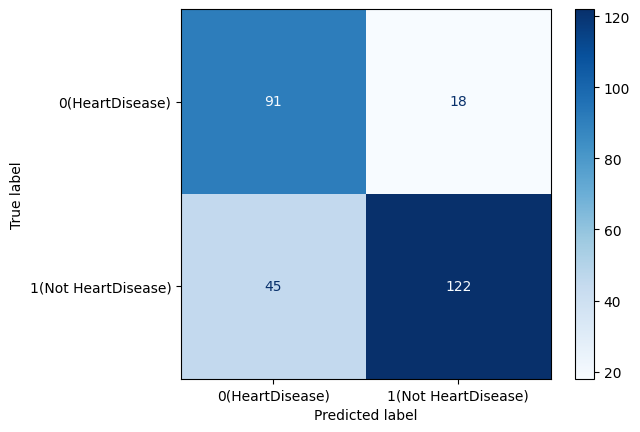

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix and print it
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Define custom class labels for display
class_labels = {0: '0(HeartDisease)', 1: '1(Not HeartDisease)'}

# Create the ConfusionMatrixDisplay with the custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[class_labels[0], class_labels[1]])

# Plot the confusion matrix using the 'Blues' colormap
disp.plot(cmap=plt.cm.Blues)
plt.show()

The confusion matrix illustrates the performance of the classification model by comparing predicted labels (columns) with the actual labels (rows). Based on the provided confusion matrix:

**Top-left (True Positive, TP = 91):** 91 cases were accurately classified as "HeartDisease."

**Top-right (False Negative, FN = 18):** 18 cases actually having "HeartDisease" were mistakenly classified as "Not HeartDisease."

**Bottom-left (False Positive, FP = 45):** 45 cases actually without "HeartDisease" were incorrectly identified as having "HeartDisease."

**Bottom-right (True Negative, TN = 122):** 122 cases were correctly classified as "Not HeartDisease."

**Insight:**

The model correctly identified 91 patients with HeartDisease and 122 patients without HeartDisease.

However, it misclassified 18 HeartDisease patients as healthy and incorrectly predicted 45 healthy patients as having HeartDisease.

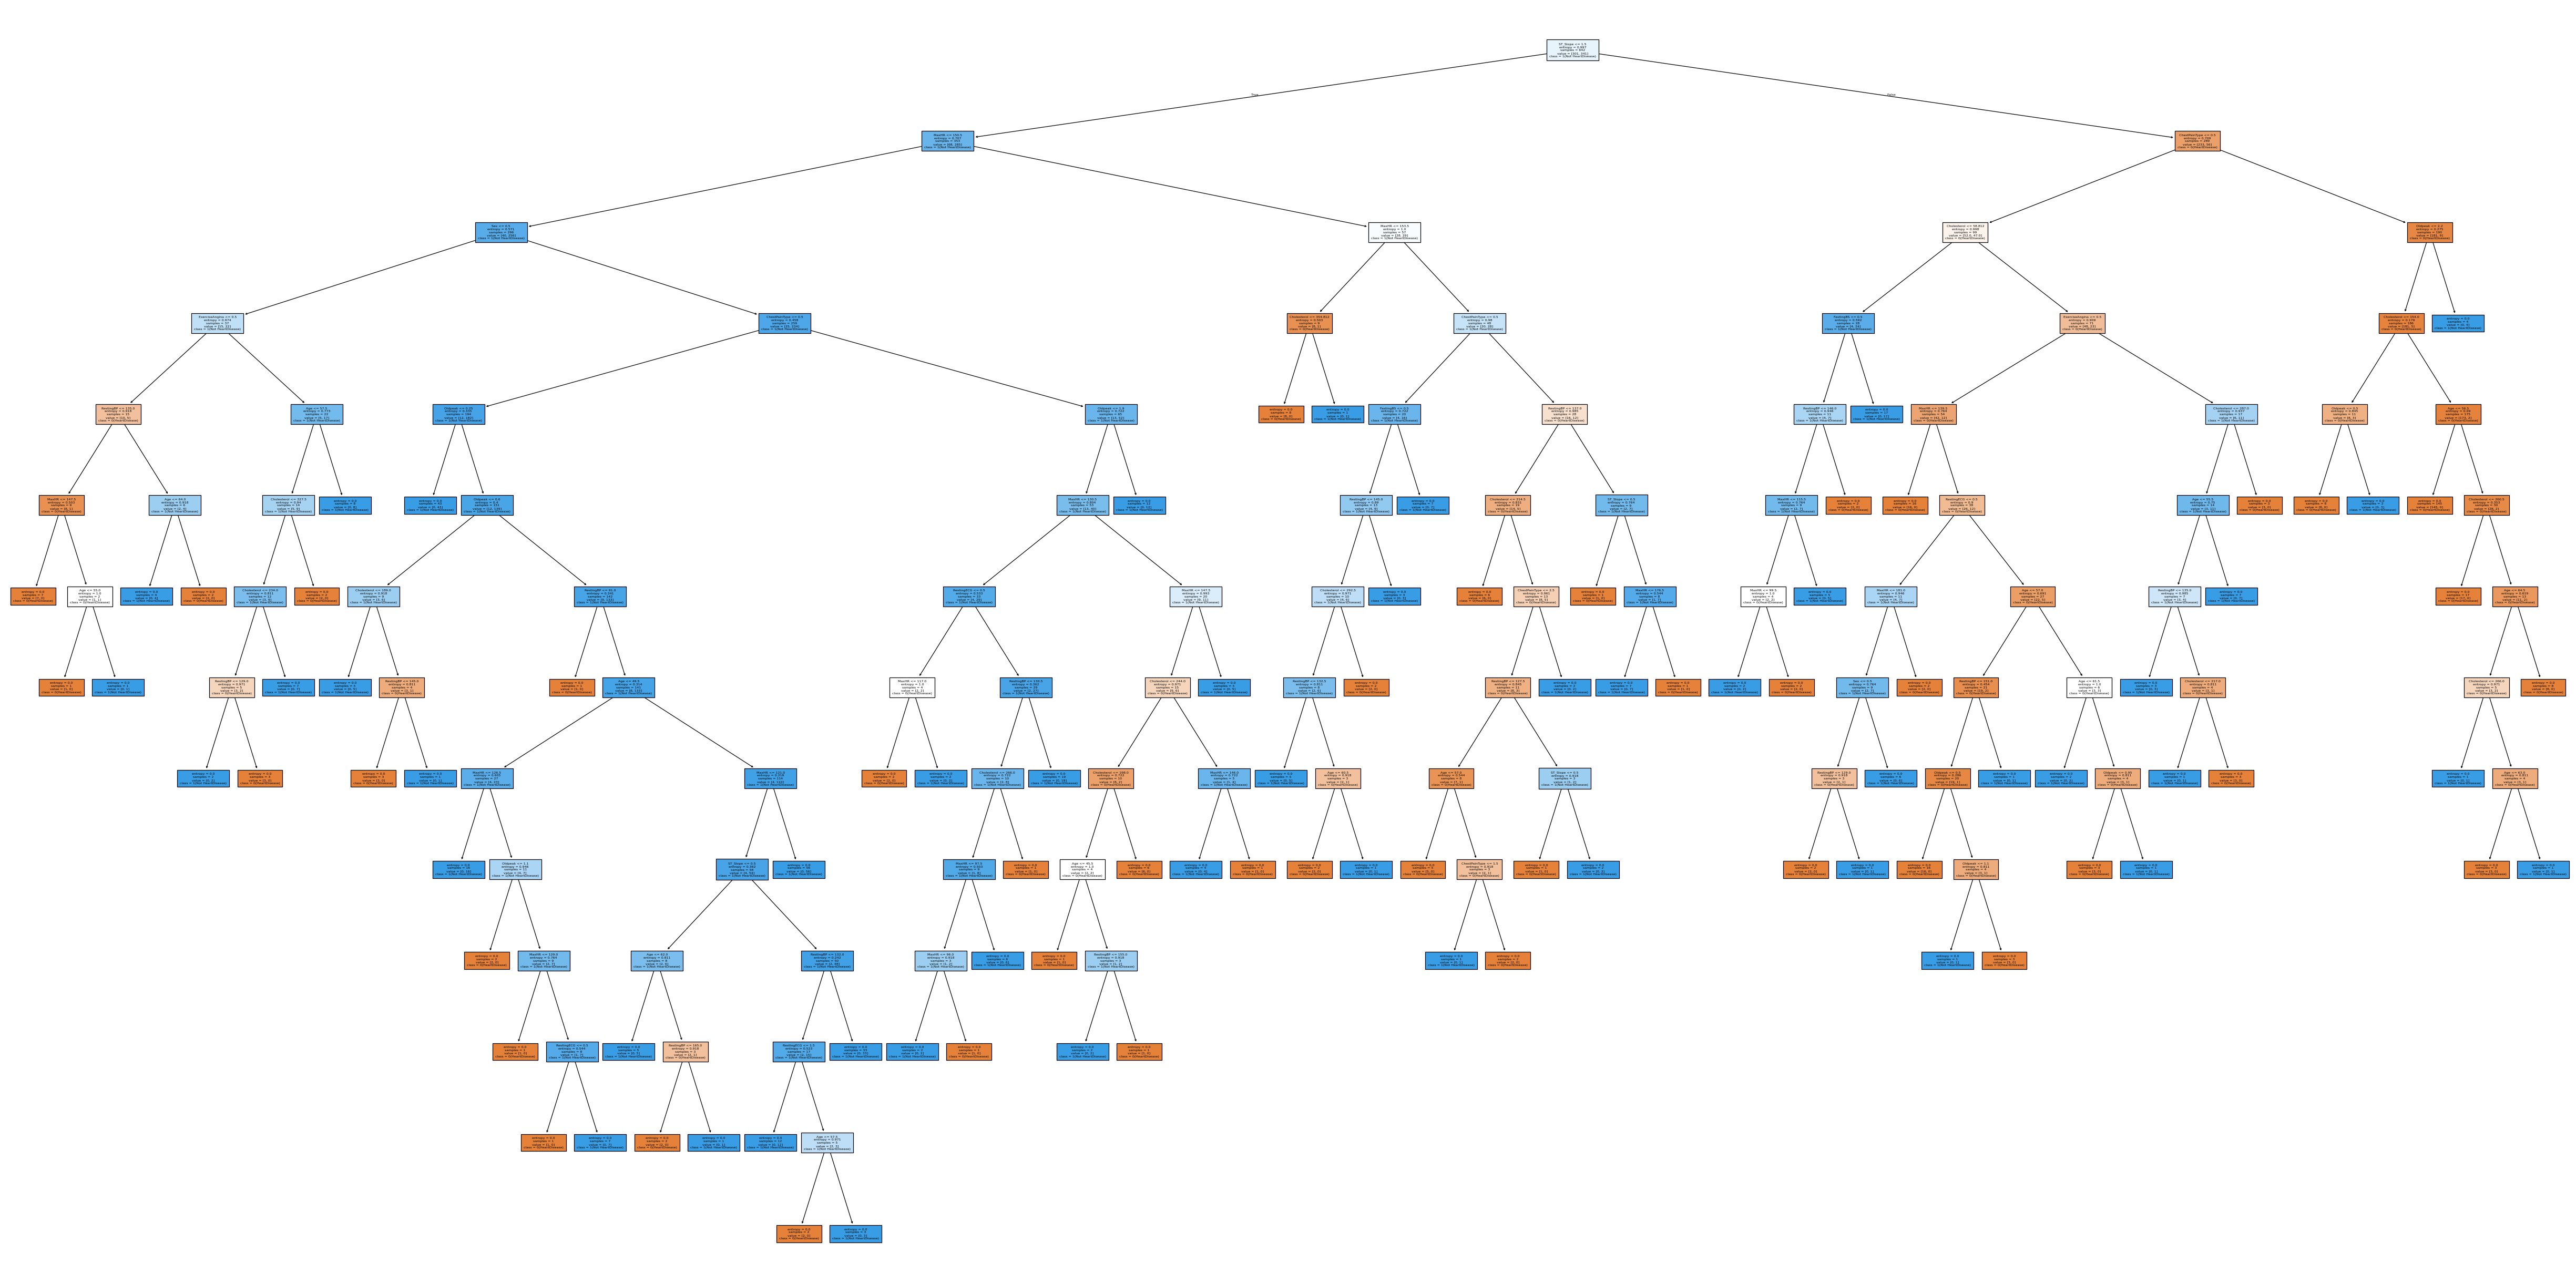

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(70, 35), dpi=90)

# Define custom class labels
class_labels = {0: '0(HeartDisease)', 1: '1(Not HeartDisease)'}

# Plot the decision tree using the trained classifier 'classifier' # Changed clf to classifier
tree.plot_tree(
    classifier, # Changed clf to classifier
    feature_names=fn,
    class_names=[class_labels[0], class_labels[1]],
    filled=True,
    fontsize=5,    # big text = bigger box
    ax=ax
)

# Display the plot
plt.show()

**Initial Split**

The decision tree begins with a root node that selects the feature with the highest Information Gain (Entropy). This split produces the greatest reduction in uncertainty and separates the dataset into two major groups with different class distributions.


**Intermediate Nodes**

After the first split, the tree continues dividing the data using features like ChestPainType, ExerciseAngina, and Oldpeak. These features appear often because they help the model refine the risk level of each patient. The deeper splits use additional attributes to improve accuracy, but they contribute less than the main ones at the top.


**Branching Pathways**

The branching structure includes both short and long paths, reflecting simple cases and more complex patterns. The wide and deep layout indicates that the dataset contains varied feature interactions that require multiple decision steps.


**Leaf Nodes**

At the bottom of the tree, each leaf node represents the final predicted class. Orange leaves correspond to HeartDisease, while blue leaves represent Not HeartDisease. Patients reach these leaves based on the combination of feature conditions above them. Many leaves are pure, showing that the tree confidently separates high-risk and low-risk patients.

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix and print it
cm2 = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm2)

# Calculate Accuracy and Error Rate
accuracy = metrics.accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)

# Extract True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = cm2[1, 1]
TN = cm2[0, 0]
FP = cm2[0, 1]
FN = cm2[1, 0]

# Compute Sensitivity (Recall), Specificity, and Precision
sensitivity = TP / (TP + FN)   # Recall: TP / (TP + FN)
specificity = TN / (TN + FP)
precision   = TP / (TP + FP)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)


Confusion matrix:
 [[ 91  18]
 [ 45 122]]
Accuracy: 0.7717391304347826
Error Rate: 0.2282608695652174
Sensitivity: 0.7305389221556886
Specificity: 0.8348623853211009
Precision: 0.8714285714285714


**Accuracy:**

Indicates the percentage of total predictions the model classified correctly. The model reached an accuracy of 77.17%, meaning it correctly predicted about 77% of all cases.

**Error Rate:**

Represents the percentage of predictions that were incorrect. The error rate is approximately 22.83%.

**Sensitivity (Recall):**

Shows the model’s effectiveness in identifying true cases of heart disease. The sensitivity is 73.05%, suggesting the model successfully captures most positive (heart disease) cases.

**Specificity:**

Measures how accurately the model identifies individuals who do not have heart disease. With a specificity of 83.49%, the model performs strongly in recognizing true negative cases.

**Precision:**

Reflects how many of the model’s positive predictions were actually correct. The precision is 87.14%, indicating that predictions labeled as heart disease are highly reliable.



**Outcomes:**

- The model delivers a solid  accuracy of (77.17%).

- With a sensitivity of 73.05%, it is effective at identifying individuals who truly have heart disease.

- Its specificity of 83.49% demonstrates strong ability to correctly recognize those without the condition.

- The high precision (87.14%) shows that when the model predicts heart disease, it is usually correct.


Splitting Data into: 60% Training and 40% Test:

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split the data: 60% for training and 40% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1
)

# Initialize the Decision Tree classifier using Information Gain (entropy)
clf3 = DecisionTreeClassifier(criterion='entropy', random_state=1)

# Train the classifier on the training data
clf3.fit(X_train, y_train)

# Predict labels for the test set
y_pred = clf3.predict(X_test)

Confusion Matrix:
 [[120  33]
 [ 51 164]]


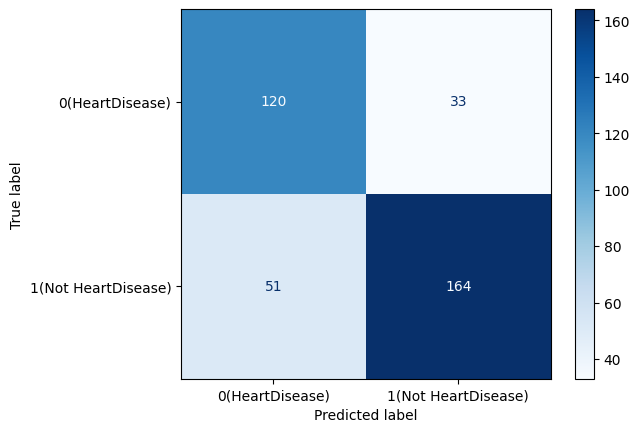

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix and print it
cm3 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm3)

# Define custom class labels
class_labels = {0: '0(HeartDisease)', 1: '1(Not HeartDisease)'}

# Create and plot the confusion matrix display using the 'Blues' colormap
disp = ConfusionMatrixDisplay(confusion_matrix=cm3,
                              display_labels=[class_labels[0], class_labels[1]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

The confusion matrix illustrates the performance of the classification model by comparing predicted labels (columns) with the actual labels (rows). Based on the provided confusion matrix:

**Top-left (True Positive, TP = 120):** 120 cases were accurately classified as "HeartDisease."

**Top-right (False Negative, FN = 33):** 33 cases actually having "HeartDisease" were mistakenly classified as "Not HeartDisease."

**Bottom-left (False Positive, FP = 51):** 51 cases actually without "HeartDisease" were incorrectly identified as having "HeartDisease."

**Bottom-right (True Negative, TN = 164):** 164 cases were correctly classified as "Not HeartDisease."

**Insight:**

The model correctly identified 120 patients with HeartDisease and 164 patients without HeartDisease.

However, it misclassified 33 HeartDisease patients as healthy and incorrectly predicted 51 healthy patients as having HeartDisease.

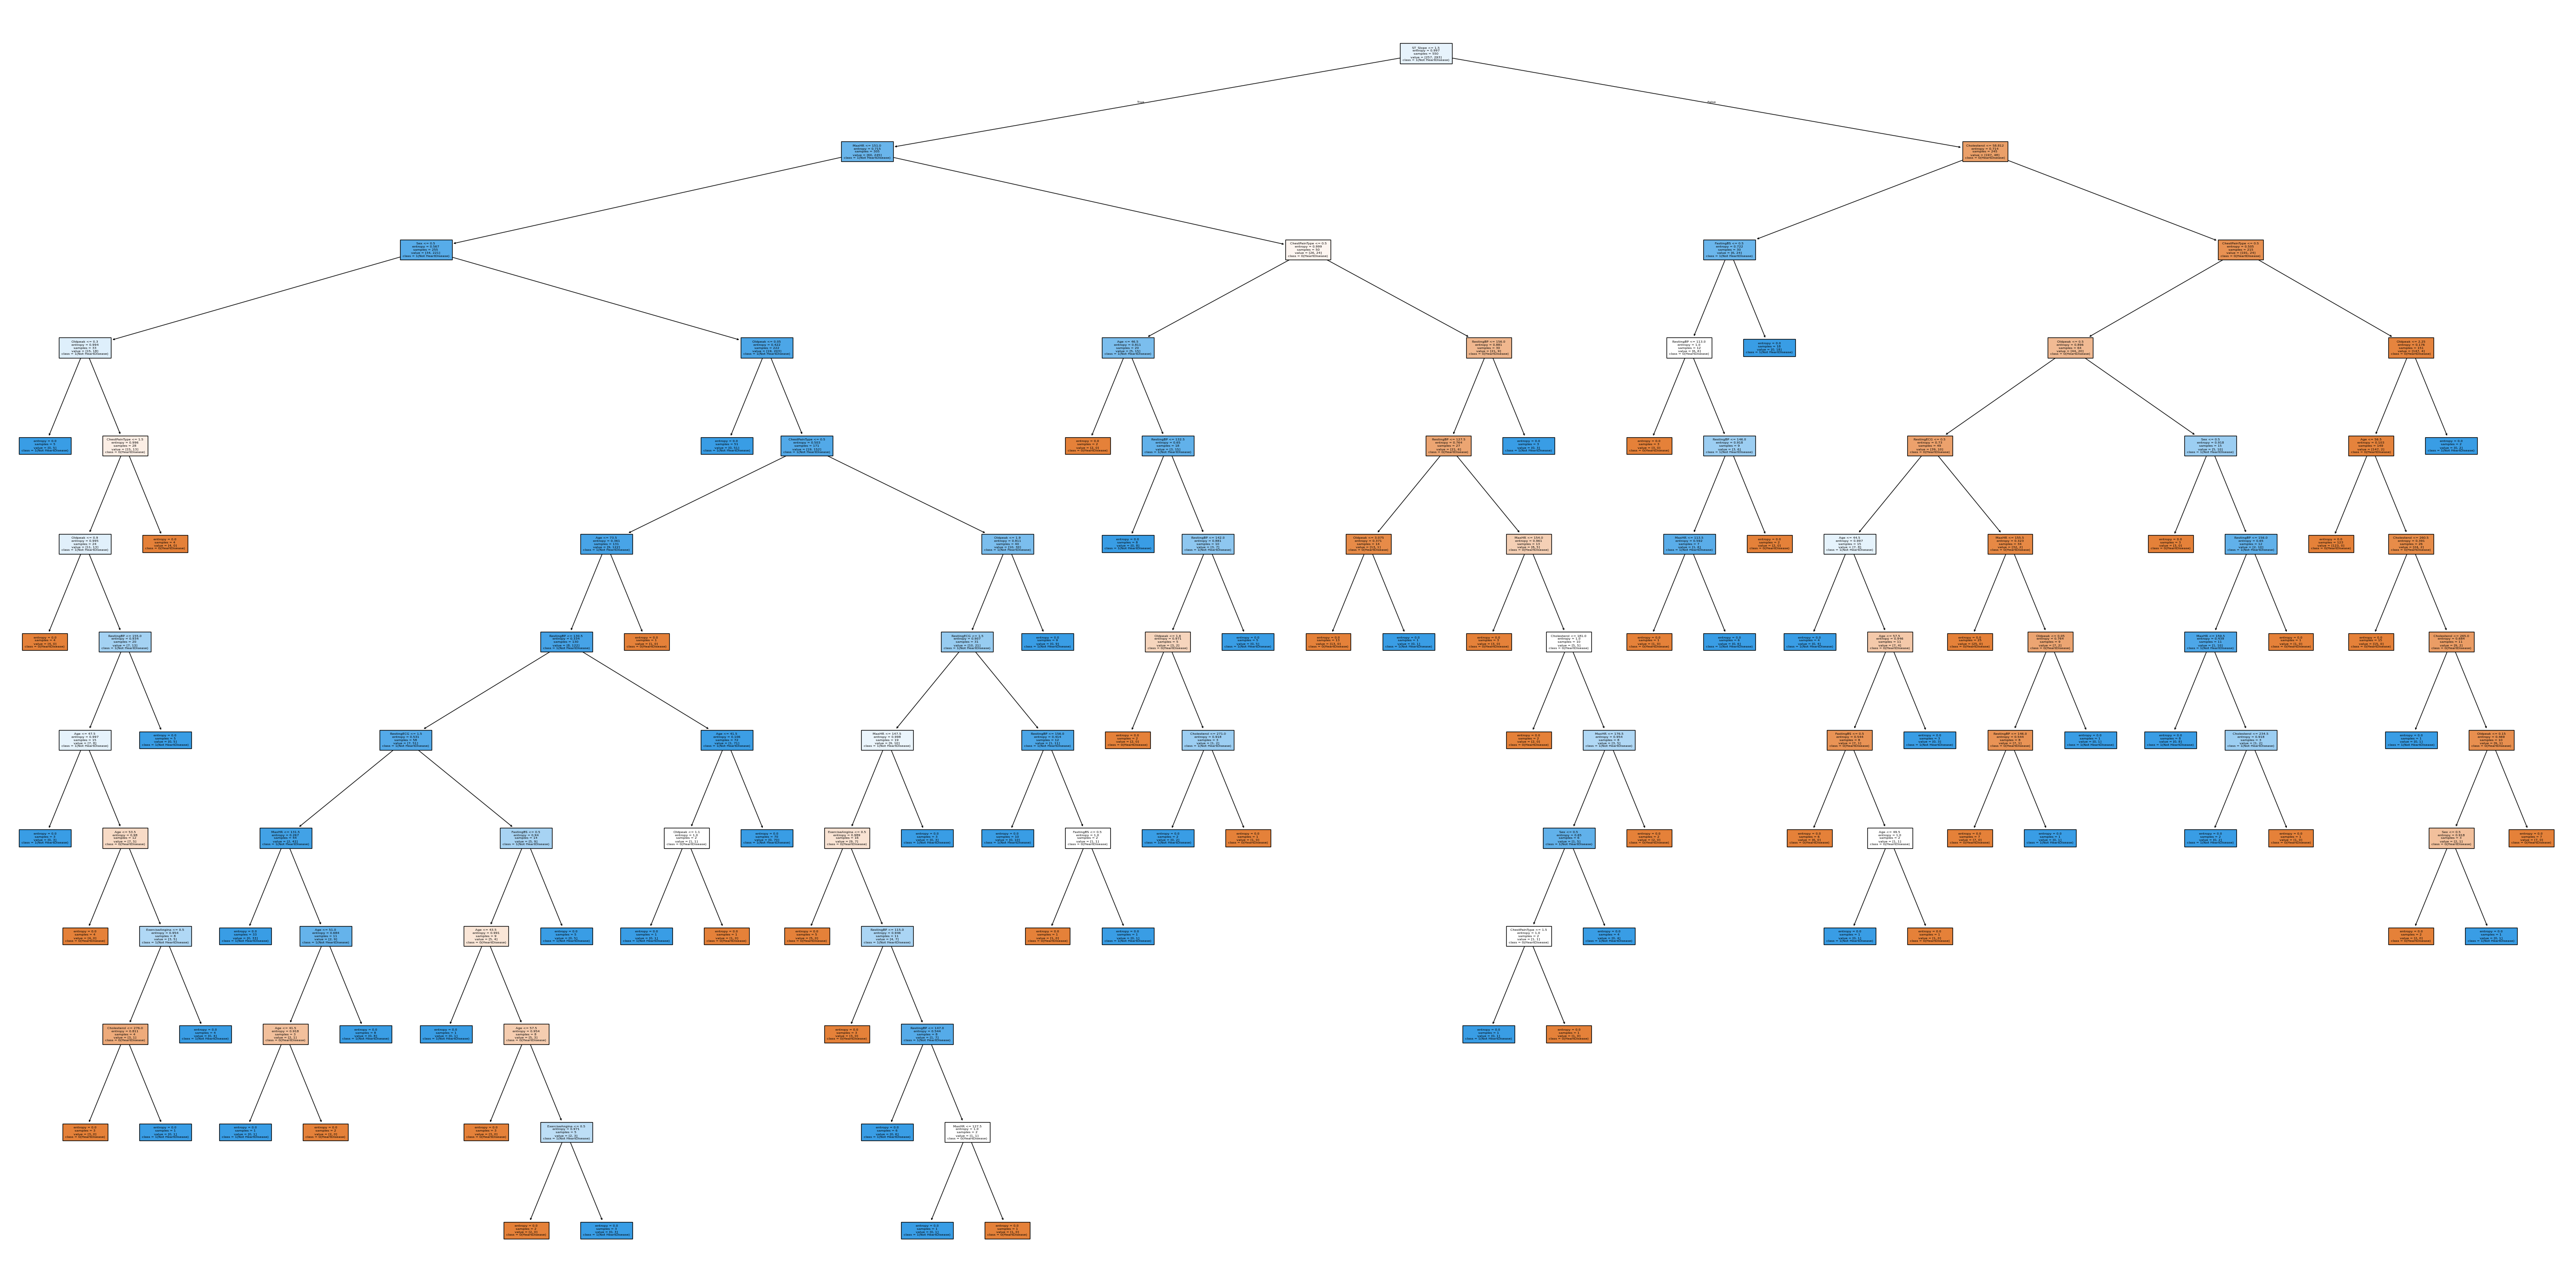

In [ ]:


import matplotlib.pyplot as plt
from sklearn import tree

# Create a figure and axis with the specified size and resolution
fig, ax = plt.subplots(figsize=(70, 35), dpi=90)

# Define custom class labels
class_labels = {0: '0(HeartDisease)', 1: '1(Not HeartDisease)'}

# Plot the decision tree using clf3, with feature names and custom class labels, and fill the nodes with colors
tree.plot_tree(clf3,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]],
               filled=True,
               fontsize=5,
               ax=ax)

# Display the plot
plt.show()

**Initial Split**

The decision tree begins with the feature that provides the highest information gain, creating the most effective separation between patients with heart disease and those without it. The root node divides the 550 samples into two major groups based on the strongest predictive attribute in the dataset.

**Subsequent Nodes**

After the initial split, the tree continues refining the classification using features such as ChestPainType, ExerciseAngina, and Oldpeak. These attributes appear in the upper and middle sections because they contribute significantly to identifying symptom patterns and exercise responses. Additional features like MaxHR, RestingBP, and Cholesterol appear deeper in the tree to handle more detailed distinctions.

**Leaf Nodes**

The leaf nodes at the bottom represent the final class labels: orange for HeartDisease and blue for No HeartDisease. Each leaf reflects the result of all decision rules applied along its branch. Most leaves show strong class purity, indicating confident predictions, while a few mixed leaves appear where patterns overlap.

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix and print it
cm3 = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm3)

# Calculate and print Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print Error Rate (1 - Accuracy)
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Extract True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = cm3[1, 1]
TN = cm3[0, 0]
FP = cm3[0, 1]
FN = cm3[1, 0]

# Calculate and print Sensitivity (Recall)
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Calculate and print Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Calculate and print Precision
precision = TP / (TP + FP)
print("Precision:", precision)


Confusion matrix:
 [[120  33]
 [ 51 164]]
Accuracy: 0.7717391304347826
Error Rate: 0.2282608695652174
Sensitivity: 0.7627906976744186
Specificity: 0.7843137254901961
Precision: 0.8324873096446701


**Accuracy:**

Represents the percentage of all predictions the model correctly classified. The model achieved an accuracy of 77.17%, meaning it accurately predicted about 77% of all cases.

**Error Rate:**

Indicates the percentage of incorrect predictions. The model’s error rate is approximately 22.83%.

**Sensitivity (Recall):**

Measures how effectively the model identifies actual heart disease cases. With a sensitivity of 76.28%, the model successfully detects most true positive cases.

**Specificity:**

Shows how well the model identifies individuals without heart disease. The specificity is 78.43%, demonstrating solid performance in recognizing true negative cases.

**Precision:**

Reflects how many of the model’s positive predictions were correct. The precision score is 83.25%, which means that when the model predicts heart disease, it is correct the vast majority of the time.



**Outcomes:**

- The model maintains strong overall accuracy (77.17%).

- With 76.28% sensitivity, it reliably captures individuals who truly have heart disease.

- Its 78.43% specificity shows good ability to correctly classify those without the condition.

- A precision of 83.25% indicates that positive predictions made by the model are highly trustworthy.


Splitting Data into: 80% Training and 20% Test

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


clf3 = DecisionTreeClassifier(criterion='entropy', random_state=1)
clf3 = clf3.fit(X_train, y_train)


y_pred = clf3.predict(X_test)

[[62 12]
 [31 79]]


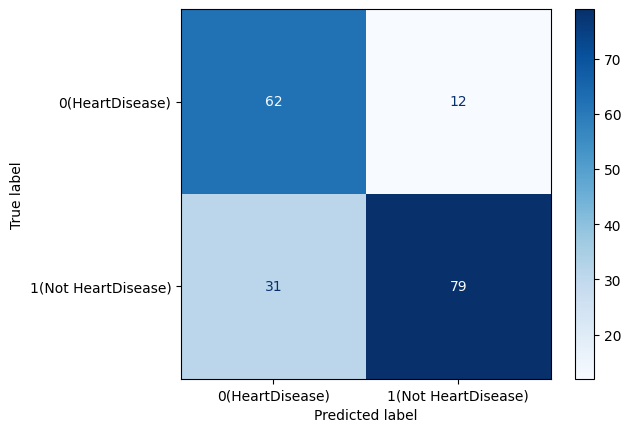

In [34]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm3 = confusion_matrix(y_test, y_pred)
print(cm3)

from sklearn.metrics import ConfusionMatrixDisplay

cm3 = confusion_matrix(y_test, y_pred)

class_labels = {0: '0(HeartDisease)', 1: '1(Not HeartDisease)'}


disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=[class_labels[0], class_labels[1]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

The confusion matrix illustrates the performance of the classification model by comparing predicted labels (columns) with the actual labels (rows). Based on the provided confusion matrix:

**Top-left (True Positive, TP = 62):** 62 cases were accurately classified as "HeartDisease."

**Top-right (False Negative, FN = 12):** 12 cases actually having "HeartDisease" were mistakenly classified as "Not HeartDisease."

**Bottom-left (False Positive, FP = 31):** 31 cases actually without "HeartDisease" were incorrectly identified as having "HeartDisease."

**Bottom-right (True Negative, TN = 79):** 79 cases were correctly classified as "Not HeartDisease."

**Insight:**

The model correctly identified 62 patients with HeartDisease and 79 patients without HeartDisease.

However, it misclassified 12 HeartDisease patients as healthy and incorrectly predicted 31 healthy patients as having HeartDisease.

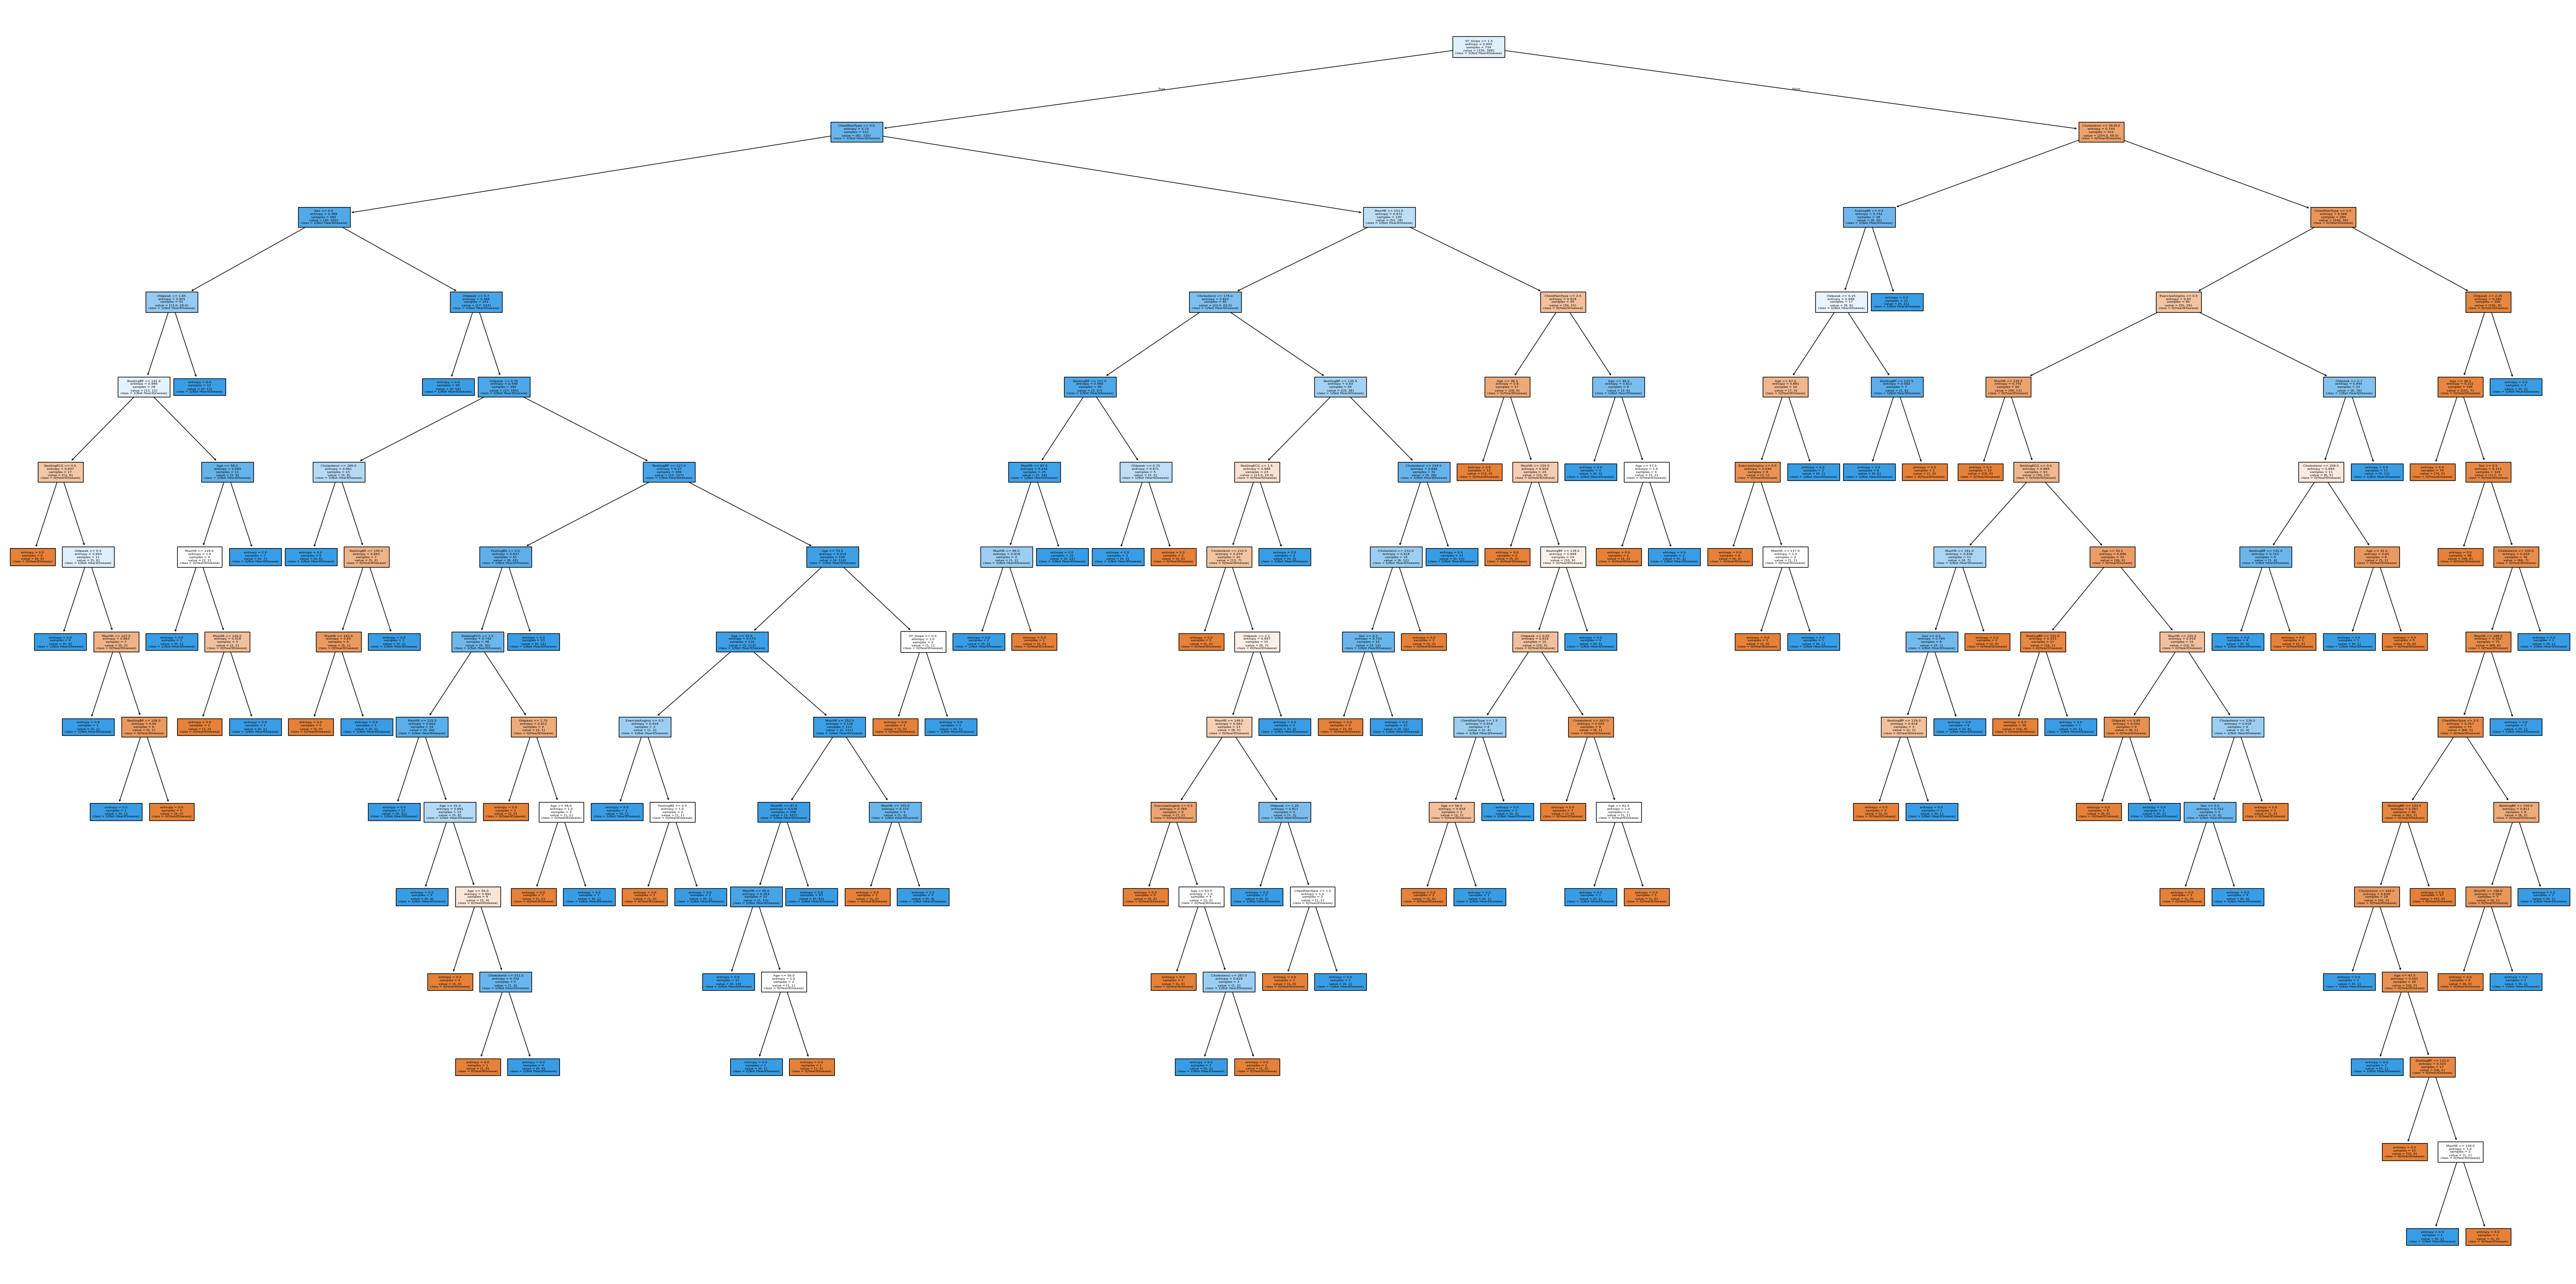

In [40]:
import matplotlib.pyplot as plt
from sklearn import tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(70, 35), dpi=90)


class_labels = {0: '0(HeartDisease)', 1: '1(Not HeartDisease)'}

tree.plot_tree(clf3,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]],
               filled=True,
               fontsize=5,
               ax=axes


               )

plt.show()



**Initial Split**

The tree starts with the attribute that produces the clearest separation between the two classes. This root decision divides the full set of samples into two broad groups with noticeably different outcome tendencies. The first split reflects the feature with the strongest impact on distinguishing heart disease presence from absence, setting the main direction for the rest of the model.

**Subsequent Nodes**

Moving downward from the root, the tree branches through several key clinical features. Attributes such as **ChestPainType**, **ExerciseAngina**, **Oldpeak**, and **MaxHR** appear repeatedly in the upper and middle levels, showing that they play major roles in shaping early decisions. These variables help group patients by symptom profiles, physical stress responses, and ECG-related indicators. Other attributes, including **RestingBP**, **Cholesterol**, and **Age**, appear in the lower parts of the structure, where they help resolve more specific or borderline cases by adding finer distinctions.

**Leaf Nodes**

The bottom of the tree contains the leaf nodes, each representing a final predicted class. **Orange leaves correspond to HeartDisease**, while **blue leaves correspond to No HeartDisease**. Many of these leaves show strong dominance of one class, indicating that the conditions leading to them create clear and consistent groupings. A smaller number of leaves contain mixed values, reflecting areas where patient characteristics overlap. Overall, the leaf distribution shows how the combination of clinical features across the branches leads to increasingly specific and confident classification outcomes.



In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm3 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm3)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm3[1, 1]
TN = cm3[0, 0]
FP = cm3[0, 1]
FN = cm3[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)


confusion matrix : 
 [[62 12]
 [31 79]]
Accuracy: 0.7663043478260869
Error Rate: 0.23369565217391308
Sensitivity: 0.7181818181818181
Specificity: 0.8378378378378378
Precision: 0.8681318681318682


**Accuracy:**

Shows the percentage of total predictions the model classified correctly. The model reached an accuracy of 76.63%, meaning it correctly predicted a little over three-quarters of all cases.

**Error Rate:**

Represents the percentage of predictions that were incorrect. The model’s error rate is approximately 23.37%.

**Sensitivity (Recall):**

Indicates how well the model identifies actual heart disease cases. With a sensitivity of 71.82%, the model successfully detects the majority of true positive cases.

**Specificity:**

Measures the model’s ability to correctly recognize individuals without heart disease. The specificity is 83.78%, showing strong performance in identifying true negative cases.

**Precision:**

Reflects how many of the model’s positive predictions were actually correct. The precision score of 86.81% indicates that most predicted heart disease cases are accurate.

**Outcomes:**

- The model demonstrates solid overall performance, with an accuracy of 76.63%.

- With 71.82% sensitivity, it effectively identifies many true heart disease cases.

- The 83.78% specificity highlights the model’s reliability in detecting individuals without the condition.

- A precision of 86.81% shows that the model’s positive predictions are highly dependable.

**Evaluate the Models of Information Gain**

Summary of the Results

| **Split**   | **Accuracy** | **Error Rate** | **Sensitivity** | **Specificity** | **Precision** |
| ----------- | ------------ | -------------- | --------------- | --------------- | ------------- |
| **70%–30%** | **0.7717**   | **0.2283**     | **0.7305**      | **0.8349**      | **0.8714**    |
| **60%–40%** | **0.7717**   | **0.2283**     | **0.7628**      | **0.7843**      | **0.8325**    |
| **80%–20%** | **0.7663**   | **0.2337**     | **0.7182**      | **0.8378**      | **0.8681**    |


**Evaluation of Models**

• Accuracy:

Accuracy remains very consistent across all three splits, ranging from 76.63% to 77.17%.
This shows that the Information Gain model performs stably, regardless of how the dataset is split. Both the 70–30 and 60–40 splits achieve the highest accuracy (77.17%), while the 80–20 split is only slightly lower.

• Error Rate:

The error rate ranges between 22.83% and 23.37%, which aligns with the accuracy results.
Since the variation is very small, this indicates that the model makes nearly the same number of incorrect predictions in all splits, showing a stable decision-making behavior.

• Sensitivity (True Positive Rate):

Sensitivity varies from 71.82% (80–20) to 76.28% (60–40).
This shows that the 60–40 split gives the best ability to detect heart-disease cases. Overall, the model consistently identifies most true positives but performs slightly better when the training portion is 60%.

• Specificity (True Negative Rate):

Specificity ranges from 78.43% to 83.78%.
The highest value comes from the 80–20 split, meaning that with more training data the model becomes more accurate at identifying healthy cases and avoids false alarms more effectively.

• Precision:

Precision ranges from 83.25% to 87.14%, with the best value seen in the 70–30 split.
Higher precision means fewer false positives, and across all splits the model maintains strong reliability when predicting heart disease.

**Conclusion**

Overall, the Information Gain model shows strong, stable, and consistent performance across all three splits. Accuracy remains around 76–77%, sensitivity and specificity are well balanced, and precision is high in every case.
The 70–30 and 80–20 splits provide the best overall balance, while the 60–40 split offers the strongest sensitivity.
These results confirm that the model generalizes well and provides reliable predictions across different training sizes.


Gini Index:
Splitting Data into: 70% Training and 30% Test:

In [18]:

from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf4 = DecisionTreeClassifier(criterion='gini',random_state=1)

clf4 = clf4. fit (X_train, y_train)

y_pred = clf4.predict (X_test)

[[ 93  16]
 [ 49 118]]


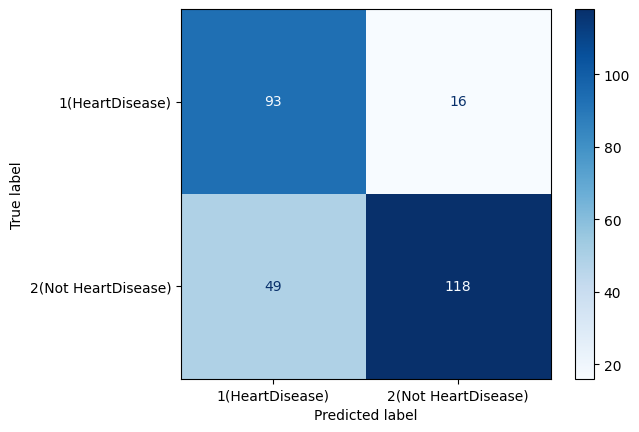

In [19]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print(cm4)


# Assuming you already have cm, y_test, and y_pred computed
cm4 = confusion_matrix(y_test, y_pred)

class_labels = {1: '1(HeartDisease)', 2: '2(Not HeartDisease)'}
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=[class_labels[1], class_labels[2]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

The confusion matrix illustrates the performance of the classification model by comparing predicted labels (columns) with the actual labels (rows). Based on the provided confusion matrix:

**Top-left (True Positive, TP = 93):** 93 cases were accurately classified as "HeartDisease."

**Top-right (False Negative, FN = 16):** 16 cases actually having "HeartDisease" were mistakenly classified as "Not HeartDisease."

**Bottom-left (False Positive, FP = 49):** 49 cases actually without "HeartDisease" were incorrectly identified as having "HeartDisease."

**Bottom-right (True Negative, TN = 118):** 118 cases were correctly classified as "Not HeartDisease."

**Insight:**

The model correctly identified 93 patients with HeartDisease and 118 patients without HeartDisease.

However, it misclassified 16 HeartDisease patients as healthy and incorrectly predicted 49 healthy patients as having HeartDisease.


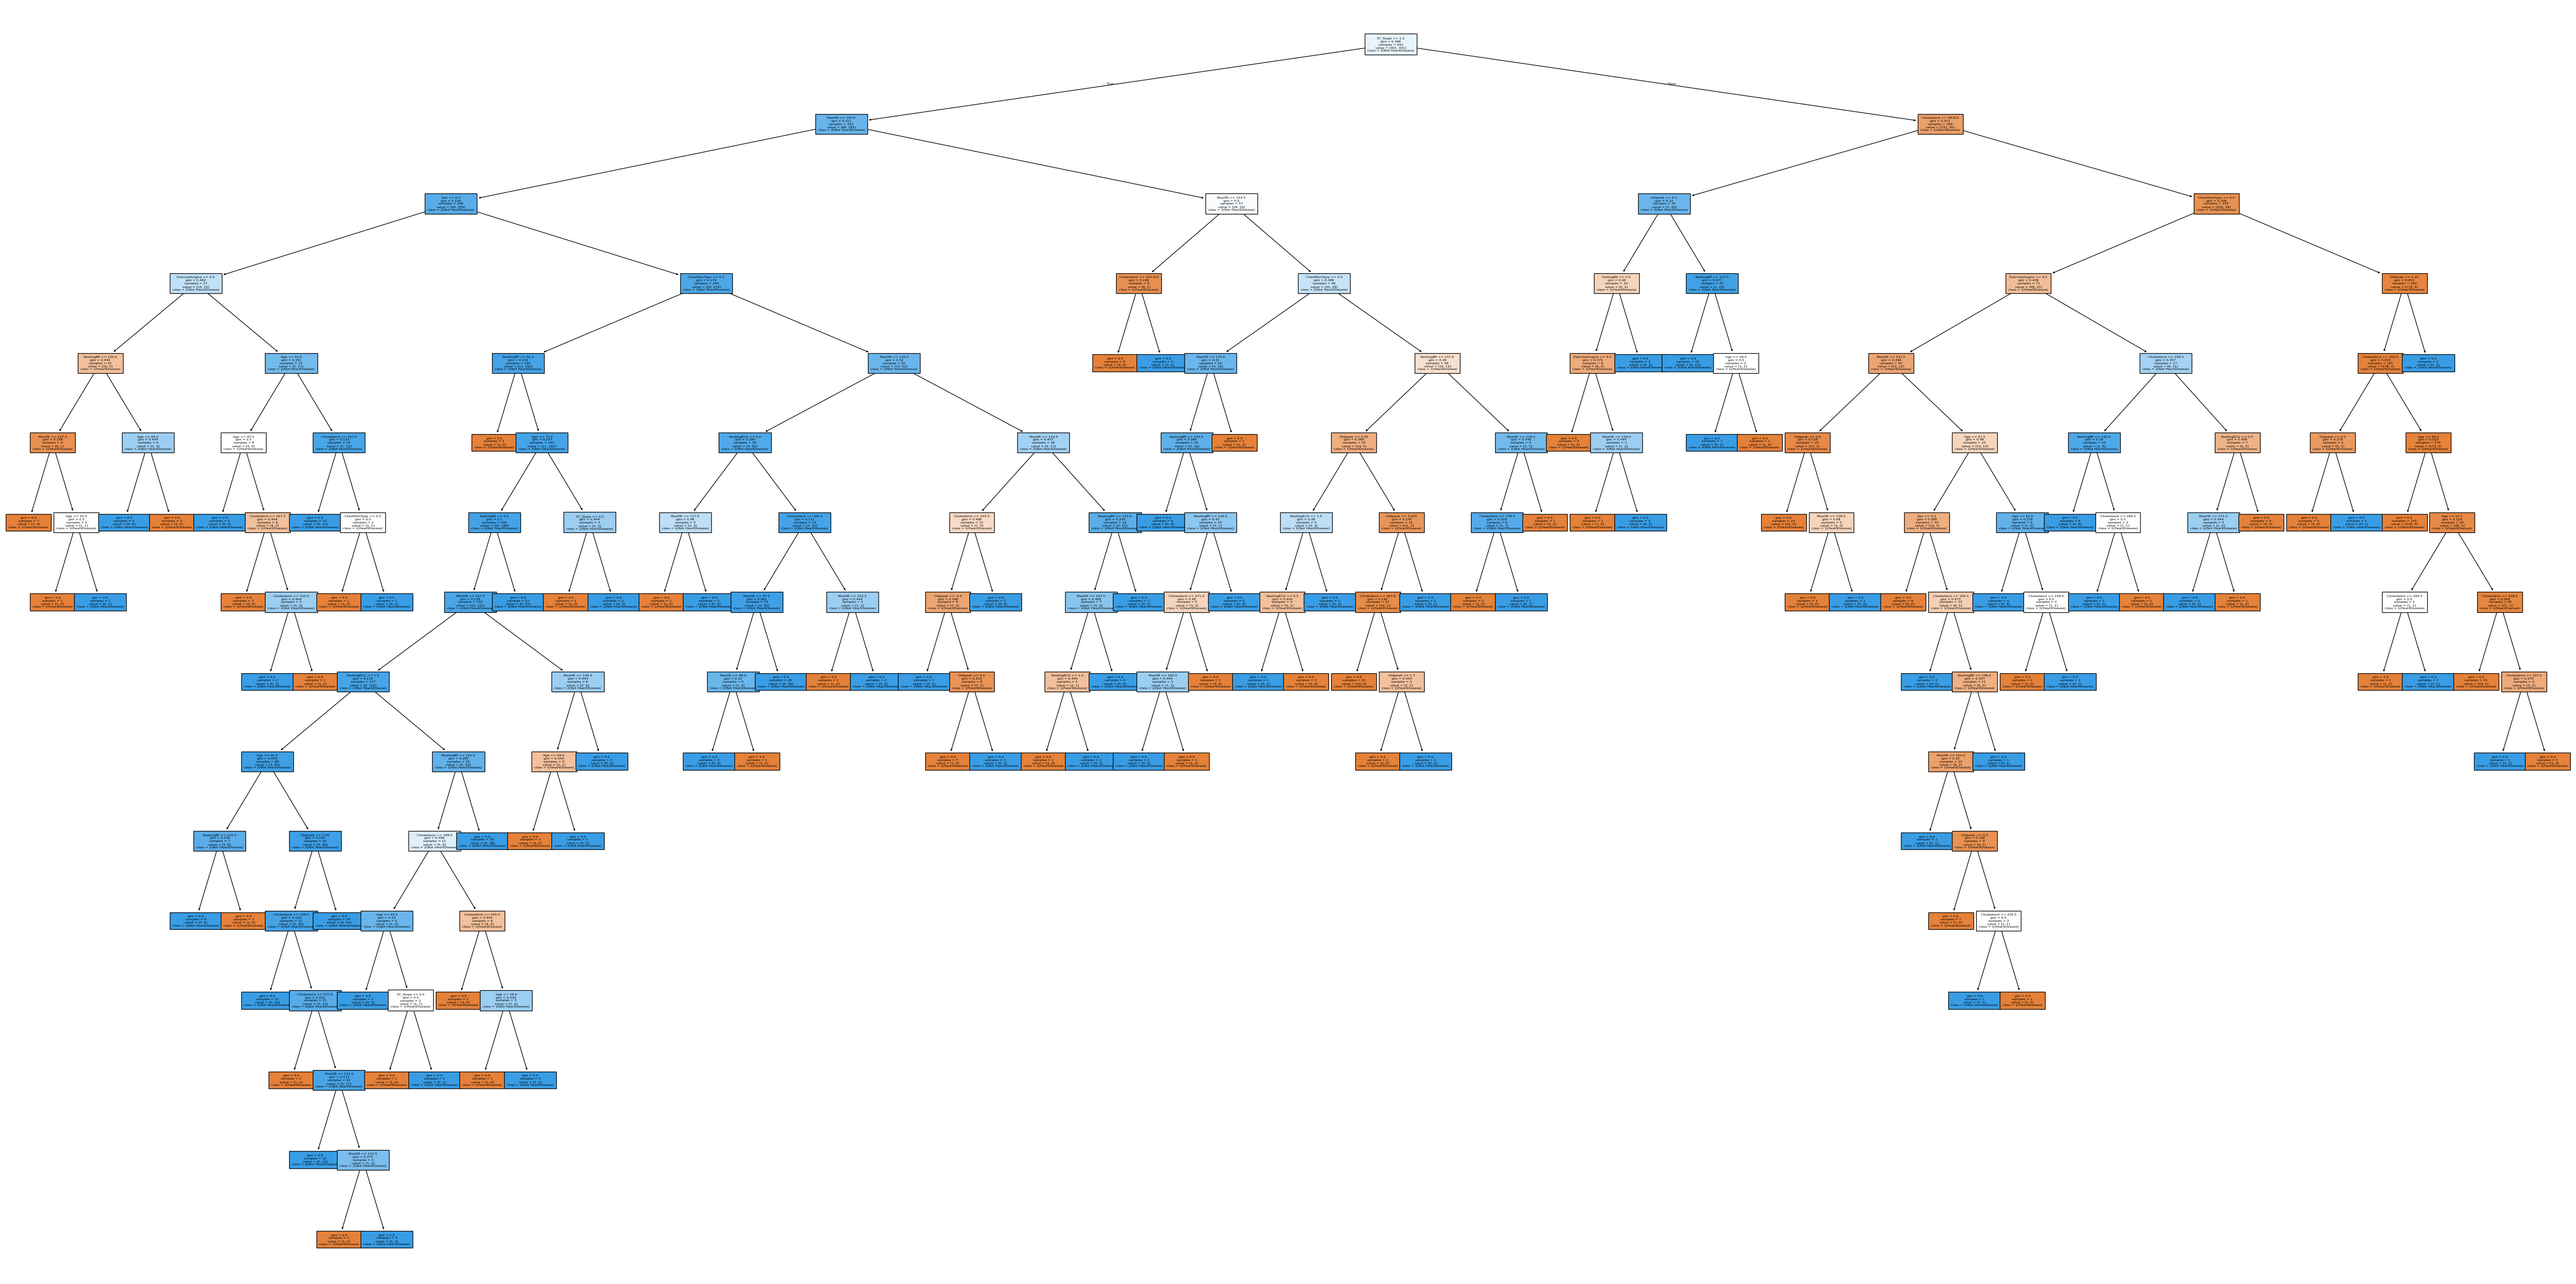

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(70, 35), dpi=90)


class_labels = {1: '1(HeartDisease)', 2: '2(Not HeartDisease)'}

tree.plot_tree(clf4,
               feature_names=fn,
               class_names=[class_labels[1], class_labels[2]],
               filled=True,
               fontsize=5,
               ax=axes

               )

plt.show()

**Initial Split**

The decision tree begins with a single feature at the root, selected because it provides the highest reduction in Gini impurity. The root node displays its impurity value, the number of samples, the class distribution, and the threshold applied to the feature. This first decision divides the dataset into two major groups, representing the most informative separation based on the value shown in the root node.

**Subsequent Nodes**

As the tree expands, it continues splitting the data using attributes such as Oldpeak, MaxHR, ChestPainType, ExerciseAngina, RestingBP, and Cholesterol. Each internal node shows the specific threshold or category used for the split, along with its updated impurity and sample count. These attributes appear throughout the upper and middle sections because their values further reduce impurity and create more distinct patient groups. Deeper nodes apply increasingly specific thresholds to resolve cases that remain mixed after earlier decisions.

**Leaf Nodes**

The leaf nodes show the final classification reached after all splits along a path. Each leaf contains the predicted class label, the Gini impurity at that endpoint, the number of samples assigned to the leaf, and the final class distribution. These leaves represent the completed decision outcomes based entirely on the sequence of attribute values and thresholds used throughout the tree.

In [ ]:


from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm4)


# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)


# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm4[1, 1]
TN = cm4[0, 0]
FP = cm4[0, 1]
FN = cm4[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)


# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[ 93  16]
 [ 49 118]]
Accuracy: 0.7644927536231884
Error Rate: 0.23550724637681164
Sensitivity: 0.7065868263473054
Specificity: 0.8532110091743119
Precision: 0.8805970149253731


**Accuracy:**

Represents how many of the model’s predictions were correct out of all predictions made. The model achieved an accuracy of 76.45%, meaning it correctly classified approximately three-quarters of the cases.

**Error Rate:**

Shows the proportion of predictions that were incorrect. The model’s error rate is 23.55%, indicating that a little under one-quarter of predictions were misclassified.

**Sensitivity (Recall):**

Indicates how effectively the model identifies true heart disease cases. With a sensitivity of 70.66%, the model successfully detects most positive cases, though some true positives are still missed.

**Specificity:**

Measures the model’s ability to correctly identify individuals without heart disease. The specificity is 85.32%, showing strong performance in recognizing true negatives.

**Precision:**

Reflects the proportion of positive predictions that were actually correct. A precision of 88.06% indicates that when the model predicts heart disease, it is accurate the vast majority of the time.

**Outcomes:**

- The model delivers a consistent overall accuracy of 76.45%.

- Its 70.66% sensitivity shows reasonable ability to detect heart disease cases.

- A high 85.32% specificity demonstrates reliability in identifying individuals without the condition.

- The strong precision of 88.06% highlights dependable positive predictions.


Splitting Data into: 60% Training and 40% Test:

In [23]:

from sklearn.tree import DecisionTreeClassifier

# Split data into 60% training and 40% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

clf = DecisionTreeClassifier(criterion='gini', random_state=1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

[[128  25]
 [ 56 159]]


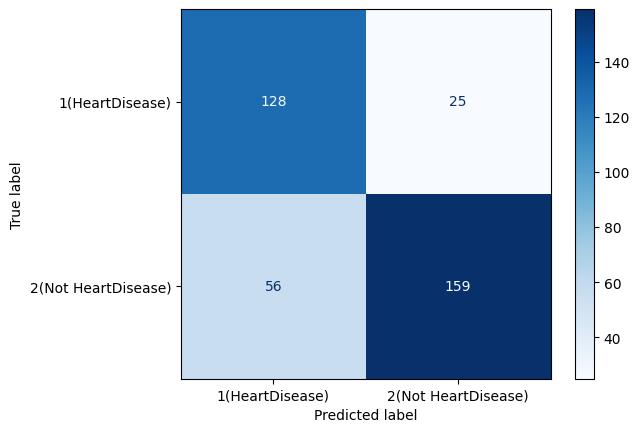

In [24]:


from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print(cm4)


# Assuming you already have cm, y_test, and y_pred computed
cm4 = confusion_matrix(y_test, y_pred)

class_labels = {1: '1(HeartDisease)', 2: '2(Not HeartDisease)'}
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=[class_labels[1], class_labels[2]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

The confusion matrix illustrates the performance of the classification model by comparing predicted labels (columns) with the actual labels (rows). Based on the provided confusion matrix:

**Top-left (True Positive, TP = 128):** 128 cases were accurately classified as "HeartDisease."

**Top-right (False Negative, FN = 25):** 25 cases actually having "HeartDisease" were mistakenly classified as "Not HeartDisease."

**Bottom-left (False Positive, FP = 56):** 56 cases actually without "HeartDisease" were incorrectly identified as having "HeartDisease."

**Bottom-right (True Negative, TN = 159): **159 cases were correctly classified as "Not HeartDisease."

**Insight:**

The model accurately identified 128 true HeartDisease cases and 159 true non-HeartDisease cases.

However, it misclassified 25 HeartDisease patients as healthy, and it also incorrectly labeled 56 healthy individuals as having HeartDisease.


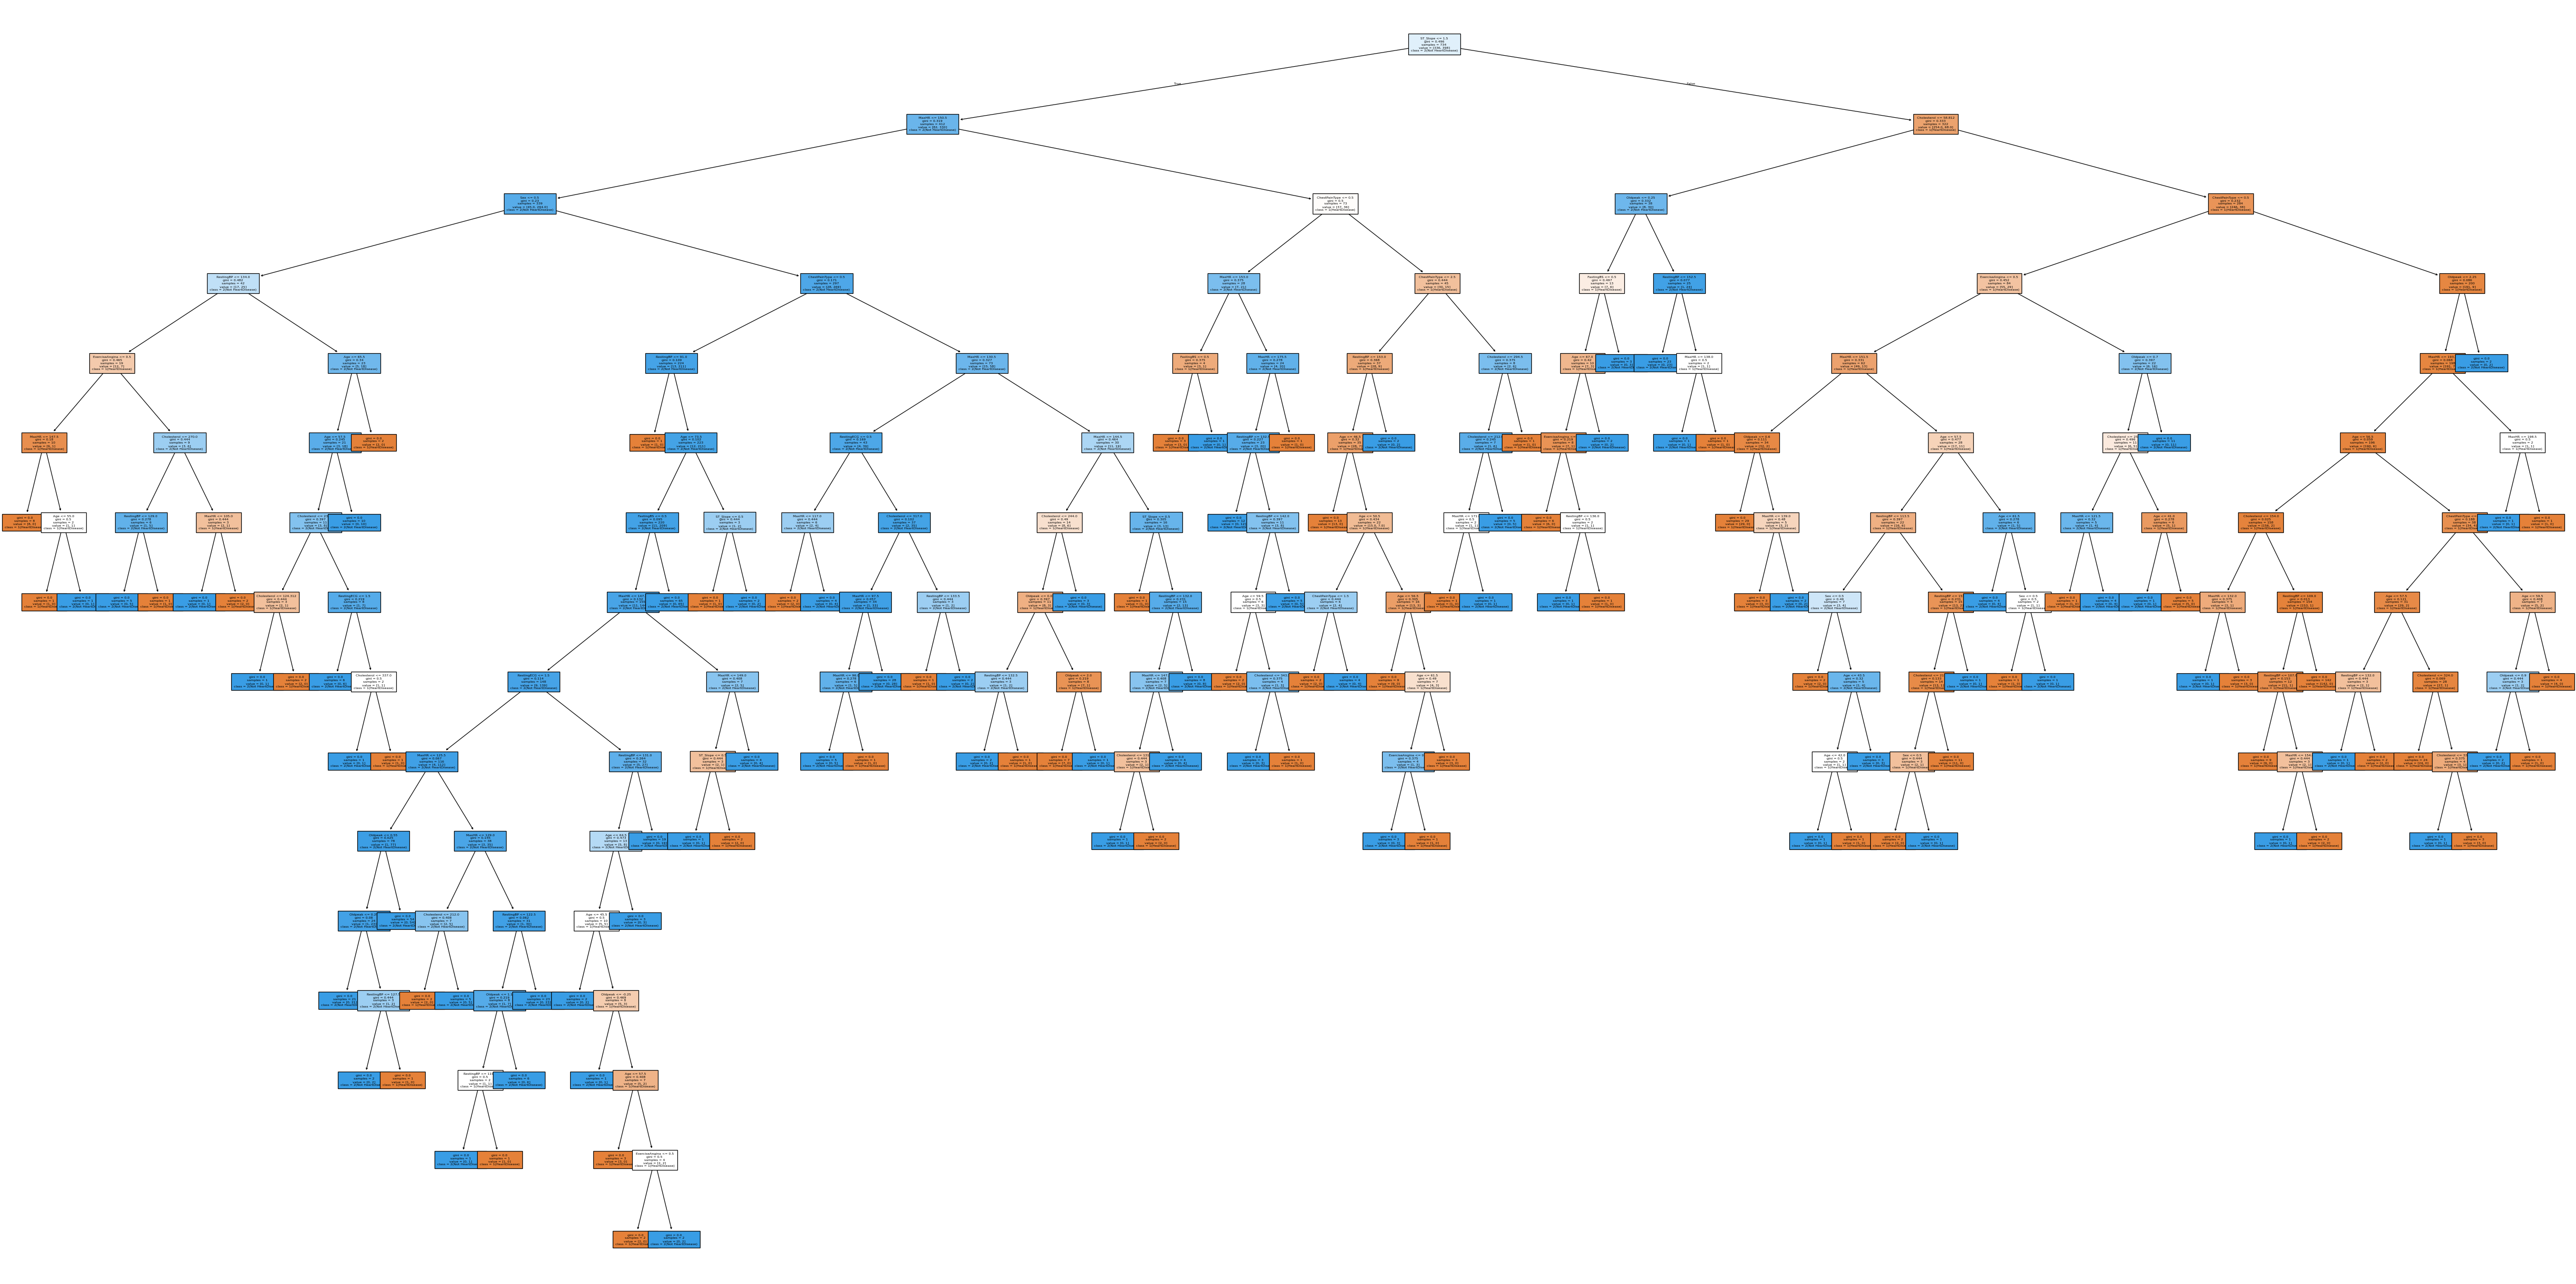

In [42]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(70, 35), dpi=90)

class_labels = {1: '1(HeartDisease)', 2: '2(Not HeartDisease)'}

plot_tree(clf,
          feature_names=X.columns,
          class_names=[class_labels[1], class_labels[2]],
          filled=True,
          fontsize=5,
          ax=axes
          )

plt.show()

**Initial Split**

The tree starts with a root node that applies the feature and threshold producing the largest reduction in Gini impurity. The node displays the impurity score, the number of samples included, and the distribution of the two classes. This first condition divides the dataset into two broad segments, establishing the most influential separation point in the entire model based on the numerical value shown in the root split.


**Subsequent Nodes**

Following the root decision, the tree develops multiple layers of internal splits that rely on attributes such as Oldpeak, MaxHR, ChestPainType, ExerciseAngina, RestingBP, Cholesterol, and Age. Each node provides the exact threshold or category used, along with its impurity and sample count. These features repeatedly appear because they continue to reduce impurity at different parts of the tree. As the model progresses to deeper levels, the conditions become more specific, addressing sample groups that were not fully separated in earlier stages.


**Leaf Nodes**

The terminal nodes at the bottom of the tree contain the final predicted class along with the impurity value, total samples, and class distribution for that endpoint. These leaves represent the conclusion of the decision-making path, reached after applying all feature thresholds from the root to the final node. Each leaf shows a completed classification outcome determined by the sequence of attribute-based conditions visible within the tree.

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm4)


# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)


# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm4[1, 1]
TN = cm4[0, 0]
FP = cm4[0, 1]
FN = cm4[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)


# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[128  25]
 [ 56 159]]
Accuracy: 0.779891304347826
Error Rate: 0.22010869565217395
Sensitivity: 0.7395348837209302
Specificity: 0.8366013071895425
Precision: 0.8641304347826086


**Accuracy:**

Shows the percentage of all predictions the model classified correctly. The model achieved an accuracy of 77.99%, meaning it correctly predicted nearly 78% of all cases.

**Error Rate:**

Represents the share of predictions that were incorrect. The error rate is approximately 22.01%, indicating that about one-fifth of predictions were misclassified.

**Sensitivity (Recall):**

Measures how well the model detects actual heart disease cases. With a sensitivity of 73.95%, the model successfully identifies most true positive cases, though some are still missed.

**Specificity:**

Indicates the model’s ability to correctly recognize cases without heart disease. The specificity of 83.66% demonstrates strong performance in detecting true negatives.

**Precision:**

Shows the proportion of positive predictions that were accurate. The precision score of 86.41% means that when the model predicts heart disease, it is correct the vast majority of the time.

**Outcomes:**

- The model performs well overall, with an accuracy of 77.99%.

- Its sensitivity of 73.95% indicates reliable detection of true heart disease cases.

- The specificity of 83.66% shows strong ability to classify individuals who do not have the condition.

- The high precision (86.41%) highlights that the model’s positive predictions are very dependable.

Splitting Data into: 80% Training and 20% Test:

In [27]:

from sklearn.tree import DecisionTreeClassifier

#Split the data (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = DecisionTreeClassifier(criterion='gini', random_state=1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

[[62 12]
 [31 79]]


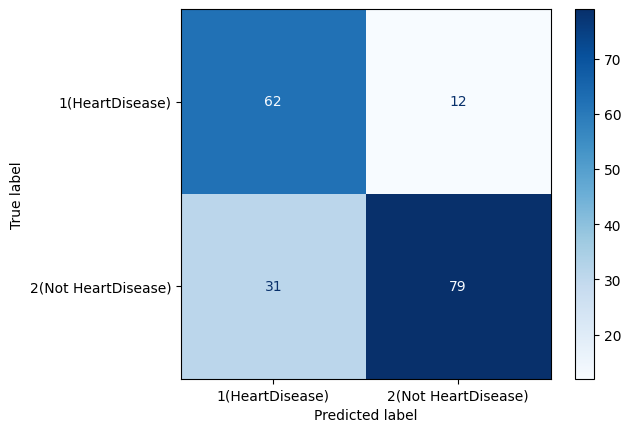

In [28]:


from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print(cm4)


# Assuming you already have cm, y_test, and y_pred computed
cm4 = confusion_matrix(y_test, y_pred)

class_labels = {1: '1(HeartDisease)', 2: '2(Not HeartDisease)'}
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=[class_labels[1], class_labels[2]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

The confusion matrix illustrates the performance of the classification model by comparing predicted labels (columns) with the actual labels (rows). Based on the provided confusion matrix:

**Top-left (True Positive, TP = 62):** 62 cases were accurately classified as "HeartDisease."

**Top-right (False Negative, FN = 12):** 12 cases actually having "HeartDisease" were mistakenly classified as "Not HeartDisease."

**Bottom-left (False Positive, FP = 31):** 31 cases actually without "HeartDisease" were incorrectly identified as having "HeartDisease."

**Bottom-right (True Negative, TN = 79):** 79 cases were correctly classified as "Not HeartDisease."

**Insight:**

The model correctly classified 62 patients with HeartDisease and 79 patients without HeartDisease.

On the other hand, it misclassified 12 HeartDisease cases as non-HeartDisease and incorrectly labeled 31 healthy patients as having HeartDisease.

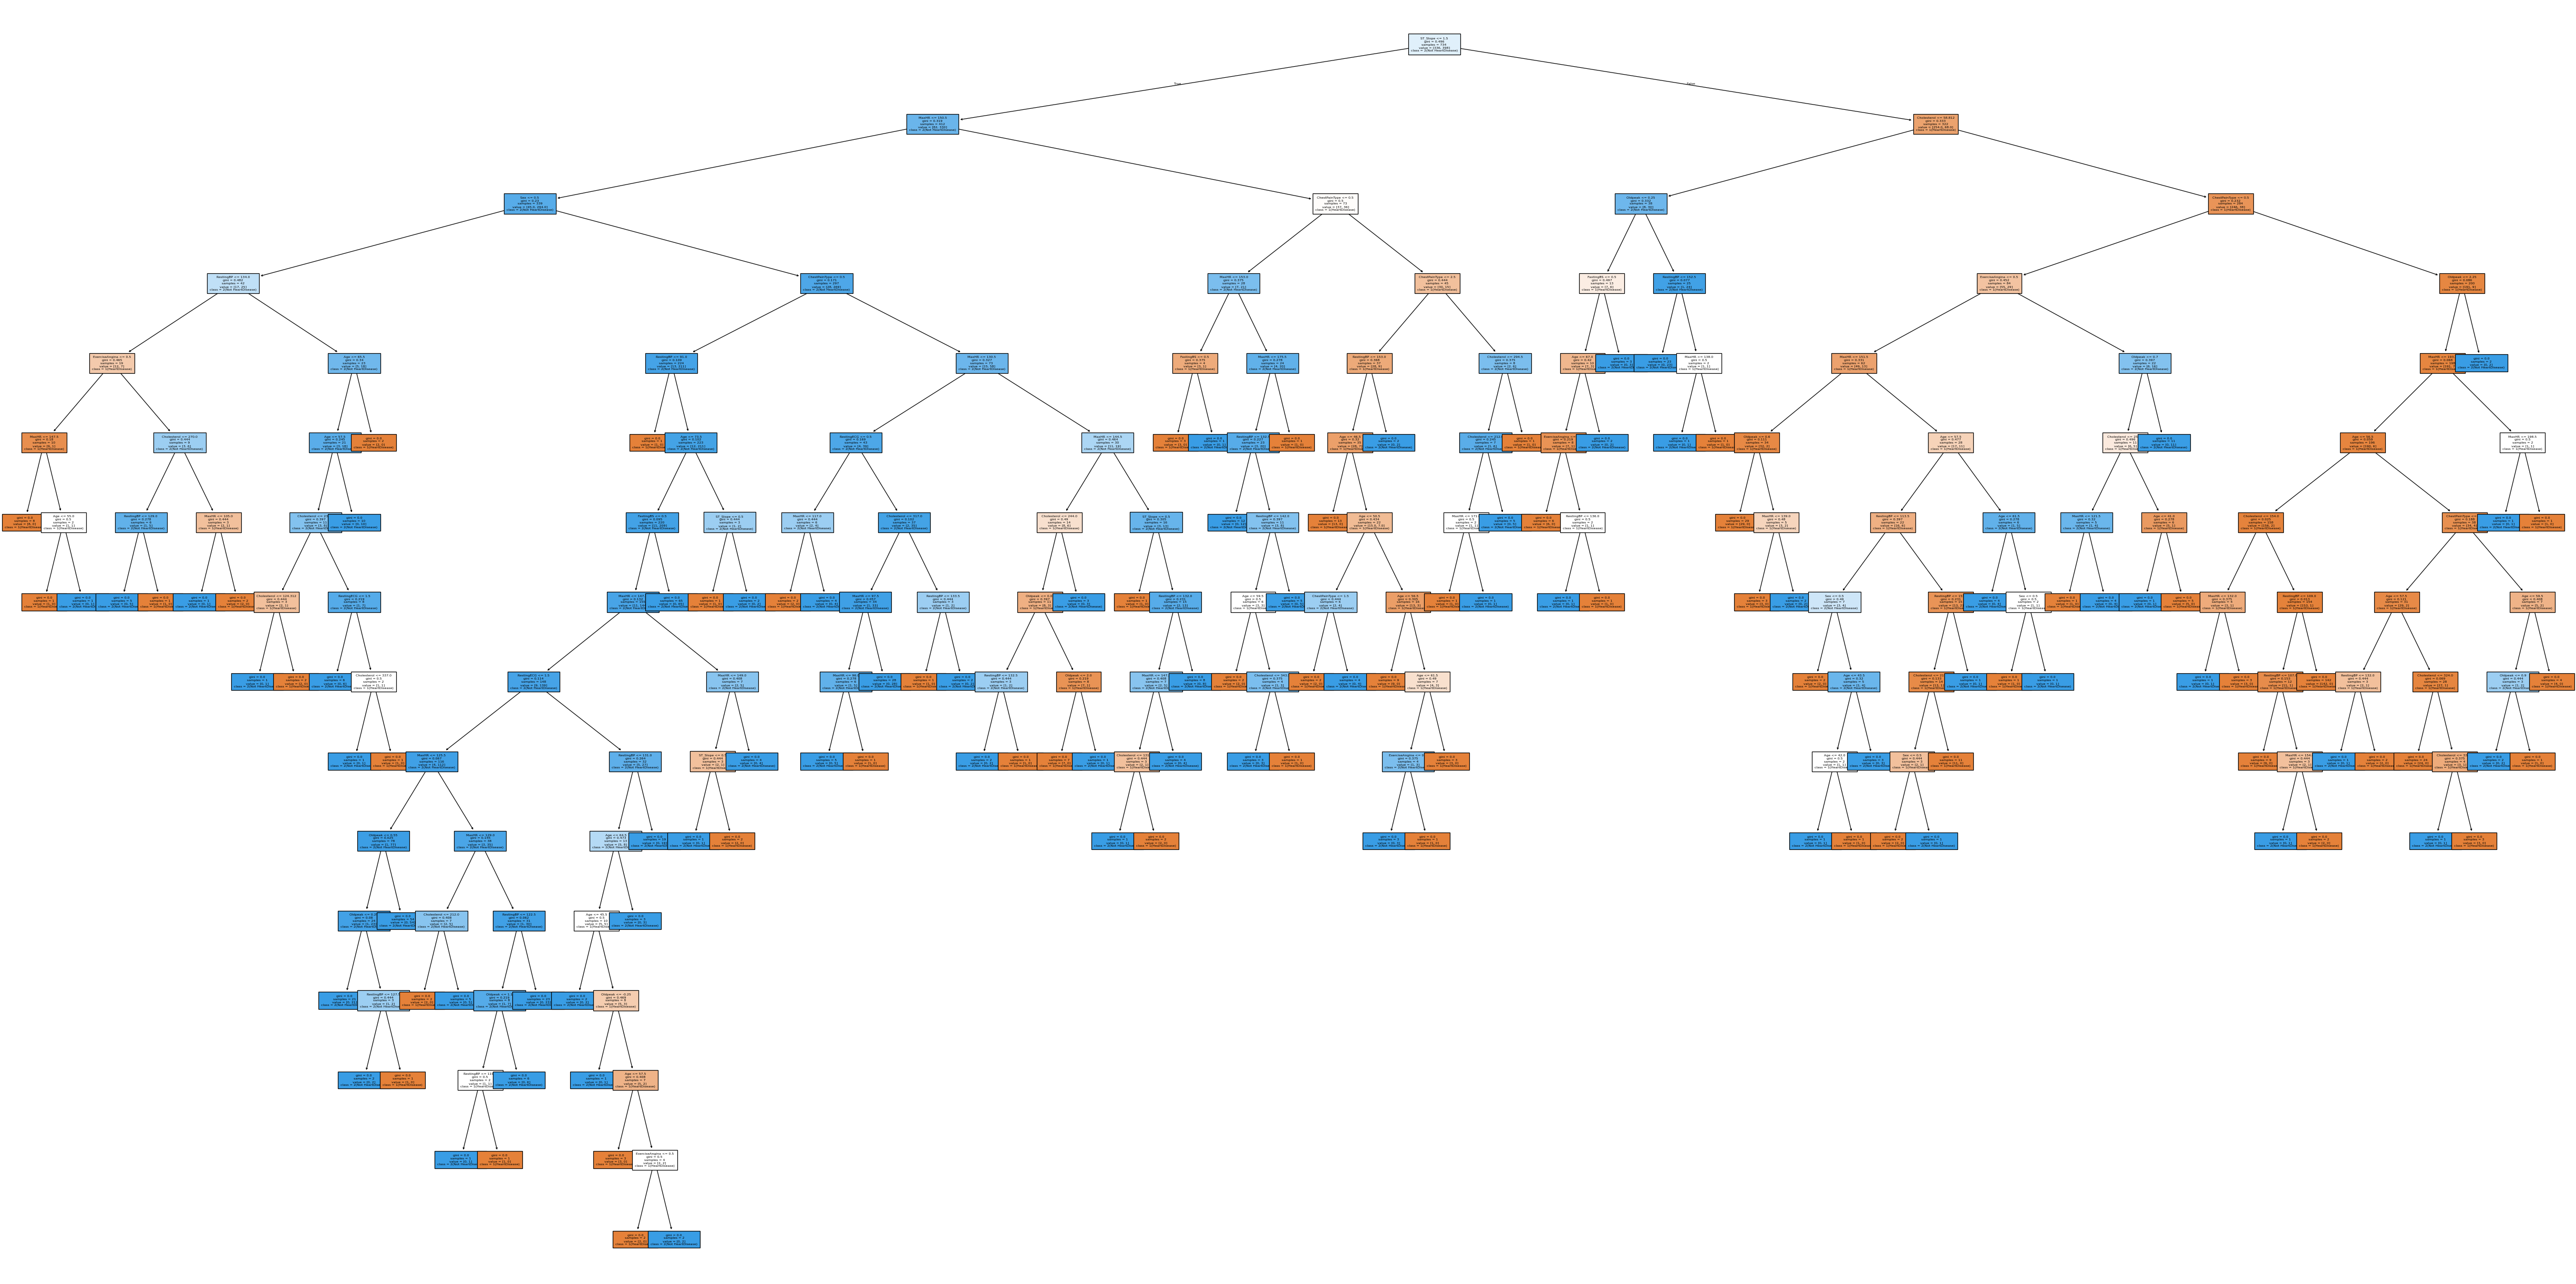

In [43]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(70, 35), dpi=90)

class_labels = {1: '1(HeartDisease)', 2: '2(Not HeartDisease)'}

plot_tree(clf,
          feature_names=X.columns,
          class_names=[class_labels[1], class_labels[2]],
          filled=True,
          fontsize=5,
         ax=axes
           )

plt.show()

**Initial Split**

The first division in this tree is created using the feature that gives the strongest reduction in Gini impurity for this dataset. The root node shows the threshold applied, as well as the impurity level and the number of samples involved. This split divides the data into two large sections that differ clearly in their class distributions, making it the most impactful decision in the entire model.

**Subsequent Nodes**

Below the root, the tree branches into multiple layers where features such as Oldpeak, ExerciseAngina, MaxHR, ChestPainType, and RestingBP are used repeatedly. Each node contains the exact condition used for the split, the updated impurity, and the sample count at that point. These attributes appear often in the upper parts of the tree because their thresholds continue to separate the data effectively. As the tree extends downward, additional splits with more specific values refine the classification for smaller groups that were not fully separated by the earlier decisions.

**Leaf Nodes**

At the terminal points of the tree, the leaf nodes list the final class decision along with the impurity value, the number of samples, and the distribution of the two classes assigned to that leaf. These nodes represent endpoints where further splitting is not beneficial or where the purity is already adequate. Every leaf summarizes the outcome reached after following the exact sequence of attribute-based conditions shown along that branch.

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm4)


# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)


# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm4[1, 1]
TN = cm4[0, 0]
FP = cm4[0, 1]
FN = cm4[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[62 12]
 [31 79]]
Accuracy: 0.7663043478260869
Error Rate: 0.23369565217391308
Sensitivity: 0.7181818181818181
Specificity: 0.8378378378378378
Precision: 0.8681318681318682


**Accuracy:**

Represents the proportion of total predictions the model classified correctly. The model achieved an accuracy of 76.63%, meaning it correctly predicted just over three-quarters of all cases.

**Error Rate:**

Indicates the percentage of predictions that were incorrect. The model’s error rate is 23.37%, showing that about one-quarter of predictions were misclassified.

**Sensitivity (Recall):**

Shows how effectively the model identifies true heart disease cases. With a sensitivity of 71.82%, the model successfully captures most positive cases, although some true positives are missed.

**Specificity:**

Measures the model’s ability to correctly classify individuals who do not have heart disease. The specificity is 83.78%, demonstrating strong performance in recognizing true negatives.

**Precision:**

Reflects the proportion of positive predictions that were actually correct. The precision score of 86.81% indicates that when the model predicts heart disease, it is accurate the vast majority of the time.

**Outcomes:**

- The model shows solid overall accuracy (76.63%).

- With 71.82% sensitivity, it reliably identifies many true heart disease cases.

- Its 83.78% specificity highlights effectiveness in recognizing individuals without the condition.

- A high precision of 86.81% means the model’s positive predictions are highly trustworthy.

**Evaluate the Models of Information Gain**

Summary of the Results

| **Split**   | **Accuracy** | **Error Rate** | **Sensitivity** | **Specificity** | **Precision** |
| ----------- | ------------ | -------------- | --------------- | --------------- | ------------- |
| **70%–30%** | **0.7645**   | **0.2355**     | **0.7066**      | **0.8532**      | **0.8806**    |
| **60%–40%** | **0.7799**   | **0.2201**     | **0.7395**      | **0.8366**      | **0.8641**    |
| **80%–20%** | **0.7663**   | **0.2337**     | **0.7182**      | **0.8378**      | **0.8681**    |


**Evaluation of Models**

• Accuracy:

Accuracy values range from 76.45% to 77.99%, showing that the Gini model performs consistently across different splits. The 60–40 split achieves the highest accuracy (77.99%), meaning the model learns slightly better with this training size. Overall, the Gini index provides stable and reliable classification results.

• Error Rate:

The error rate lies between 22.01% and 23.55%, which matches the accuracy pattern.
The lowest error rate occurs in the 60–40 split, confirming that this configuration produces the fewest incorrect predictions. The small variation across splits indicates that the model is stable and not affected heavily by changes in training size.

• Sensitivity (True Positive Rate):

Sensitivity increases from 70.66% (70–30) to 73.95% (60–40).
This shows that the model detects more heart-disease cases when trained with 60% of the data. Overall, the Gini model captures most positive cases but performs best under the 60–40 configuration.

• Specificity (True Negative Rate):

Specificity values range between 83.66% and 85.32%, with the highest value from the 70–30 split.
This means the model is strong at identifying non–heart-disease cases (true negatives). High specificity also indicates fewer false positives, showing that the model is reliable when predicting healthy cases.

• Precision:

Precision ranges from 86.41% to 88.06%, with the highest precision seen in the 70–30 split.
This means most of the model’s positive predictions (heart disease) were correct. The high precision across all splits indicates excellent accuracy in predicting heart-disease cases.

**Conclusion**

The Gini Index model shows strong performance across all three splits, with the 60–40 split producing the best accuracy and lowest error rate. The model demonstrates excellent specificity and precision, indicating that it reliably identifies healthy patients and produces few false positives. Overall, the Gini-based decision tree provides slightly stronger performance than Information Gain in some splits, while maintaining stable results across all configurations.

**Comparison of the Best Model Between Information Gain and Gini Index and Analysis of Results**

Information Gain vs. Gini Index

| **Metric**      | **Info Gain (70–30)** | **Gini (70–30)** | **Info Gain (60–40)** | **Gini (60–40)** | **Info Gain (80–20)** | **Gini (80–20)** |
| --------------- | --------------------- | ---------------- | --------------------- | ---------------- | --------------------- | ---------------- |
| **Accuracy**    | 0.7717                | 0.7645           | 0.7717                | **0.7799**       | 0.7663                | 0.7663           |
| **Error Rate**  | 0.2283                | 0.2355           | 0.2283                | **0.2201**       | 0.2337                | 0.2337           |
| **Sensitivity** | **0.7305**            | 0.7066           | **0.7628**            | 0.7395           | **0.7182**            | 0.7182           |
| **Specificity** | 0.8349                | **0.8532**       | 0.7843                | **0.8366**       | 0.8378                | **0.8378**       |
| **Precision**   | 0.8714                | **0.8806**       | 0.8325                | **0.8641**       | 0.8681                | **0.8681**       |



To compare both decision tree models, the performance metrics from each train–test split were reviewed, including accuracy, error rate, sensitivity, specificity, and precision. Both models show stable and consistent behavior across all splits, but there are clear differences in how they perform across the metrics.

1. Accuracy Comparison

**Information Gain:** Accuracy ranges from 76.63% to 77.17%.

**Gini Index:** Accuracy ranges from 76.45% to 77.99%, with the highest accuracy overall (77.99%) appearing in the 60–40 split.


The Gini Index model achieves slightly better accuracy than Information Gain, especially under the 60–40 configuration.

2. Error Rate Comparison

Both models have similar error rates, around 22–23%.

The lowest error rate appears in the Gini 60–40 split (22.01%).


The Gini model makes slightly fewer incorrect predictions compared to Information Gain.

3. Sensitivity (True Positive Rate)

**Information Gain:** Sensitivity ranges from 71.82% to 76.28%.

**Gini Index:** Sensitivity ranges from 70.66% to 73.95%.


Information Gain does a better job identifying actual heart-disease cases (true positives). It is more effective when the goal is to detect as many positive cases as possible.

4. Specificity (True Negative Rate)

**Information Gain:** Ranges 78.43% – 83.78%.

**Gini Index:** Ranges 83.66% – 85.32%.


Gini performs better at identifying healthy patients (true negatives) and produces fewer false positives. It is the better model when the priority is to avoid false alarms.

5. Precision

Information Gain: 83.25% – 87.14%

**Gini Index:** 86.41% – 88.06%


Gini achieves slightly higher precision across all splits, meaning its positive predictions (HeartDisease) are more reliable and contain fewer wrong predictions.

***Overall Analysis***

Both models show strong and stable performance, but each excels in different areas:

*Information Gain is better* when:

The priority is higher sensitivity, meaning we want to detect as many heart-disease cases as possible.

Missing a positive case is more dangerous than a false alarm.

*Gini Index is better* when:

The priority is high accuracy and high precision, meaning we want highly reliable predictions.

We want to minimize false positives and correctly identify healthy patients.

We focus on overall model stability and balanced performance.

***Best Overall Model:***

Based on the combination of highest accuracy (77.99%), lowest error rate, strong specificity, and high precision, the Gini Index model provides the strongest overall performance—especially in the 60–40 split.

However, if detecting all true heart-disease cases is the top priority, Information Gain may still be preferred due to its higher sensitivity.

# Clustering

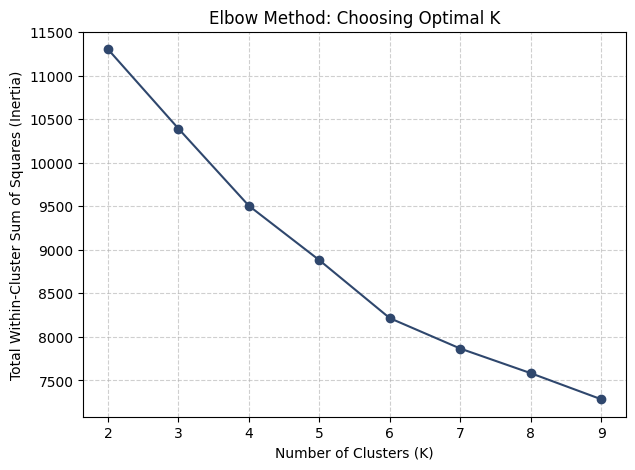

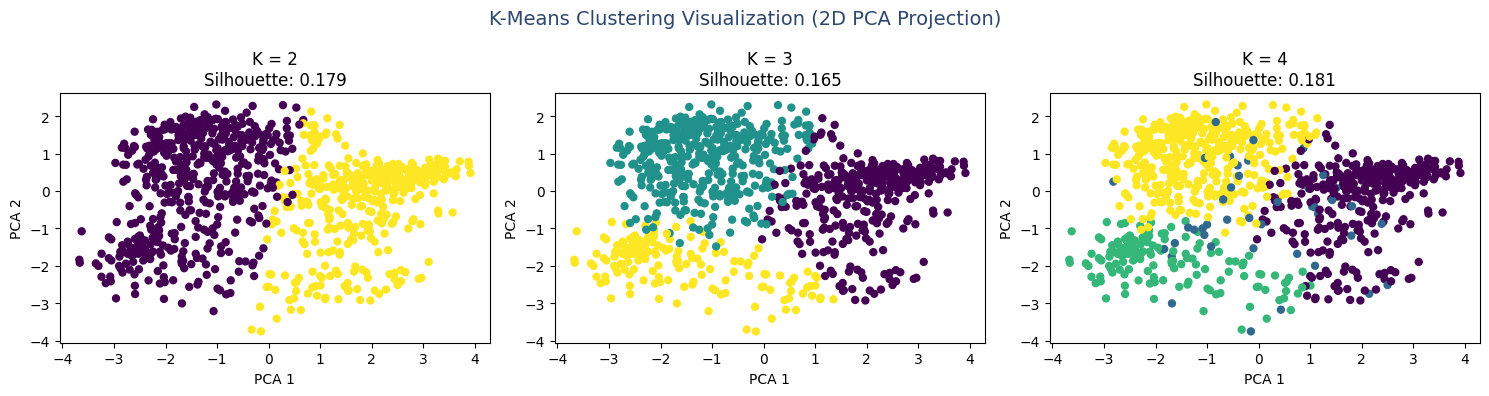

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

file_path_options = [
    "/content/sample_data/Preprocced_data (1).csv"

]
file_path = next((p for p in file_path_options if os.path.exists(p)), None)
if not file_path:
    raise FileNotFoundError("Dataset not found. Place 'Preprocessed_dataset.csv' next to the notebook.")

df = pd.read_csv(file_path)

if "HeartDisease" in df.columns:
    df = df.drop(columns=["HeartDisease"])

df_encoded = pd.get_dummies(df, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

inertias = []
K_values = range(2, 10)
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(K_values, inertias, marker='o', color='#2F476D')
plt.title("Elbow Method: Choosing Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Total Within-Cluster Sum of Squares (Inertia)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

chosen_K = [2, 3, 4]
silhouette_scores = []

for k in chosen_K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(round(sil_score, 3))

results_df = pd.DataFrame({
    "Number of Clusters (K)": chosen_K,
    "Silhouette Score": silhouette_scores
})

def highlight_best(s):
    is_max = s == s.max()
    return ['background-color: #b0d6b3; font-weight: bold' if v else '' for v in is_max]

styled = (
    results_df.style
    .hide(axis="index")
    .set_caption(" K-Means Clustering Evaluation")
    .set_table_styles([
        {"selector": "caption", "props": [("caption-side", "top"), ("font-size", "18px"), ("font-weight", "bold"), ("color", "#2F476D"), ("padding", "10px")]},
        {"selector": "th", "props": [("background-color", "#2F476D"), ("color", "white"), ("padding", "8px"), ("text-align", "center")]},
        {"selector": "td", "props": [("padding", "6px"), ("text-align", "center"), ("border", "1px solid #ddd")]},
        {"selector": "tbody tr:nth-child(even)", "props": [("background-color", "#f8f8f8")]}
    ])
    .apply(highlight_best, subset=["Silhouette Score"], axis=0)
)

display(styled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(15, 4))
for i, k in enumerate(chosen_K, 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    plt.subplot(1, 3, i)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=25)
    plt.title(f"K = {k}\nSilhouette: {round(silhouette_score(X_scaled, labels), 3)}")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
plt.suptitle("K-Means Clustering Visualization (2D PCA Projection)", fontsize=14, color="#2F476D")
plt.tight_layout()
plt.show()